<a href="https://colab.research.google.com/github/chonamwoo/snuDxd/blob/main/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./house_price_data.csv')
df.head()

,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
0,1,8450,65.0,2003,856,854,2003,8,1,3,2,548,12.247699
1,2,9600,80.0,1976,1262,0,1976,6,1,3,2,460,12.109016
2,3,11250,68.0,2001,920,866,2002,6,1,3,2,608,12.317171
3,4,9550,60.0,1915,961,756,1970,7,1,3,3,642,11.849405
4,5,14260,84.0,2000,1145,1053,2000,9,1,4,3,836,12.429220


In [4]:
print(df.info())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            1460 non-null   int64  
 1   LotArea       1460 non-null   int64  
 2   LotFrontage   1201 non-null   float64
 3   YearBuilt     1460 non-null   int64  
 4   1stFlrSF      1460 non-null   int64  
 5   2ndFlrSF      1460 non-null   int64  
 6   YearRemodAdd  1460 non-null   int64  
 7   TotRmsAbvGrd  1460 non-null   int64  
 8   KitchenAbvGr  1460 non-null   int64  
 9   BedroomAbvGr  1460 non-null   int64  
 10  GarageCars    1460 non-null   int64  
 11  GarageArea    1460 non-null   int64  
 12  price         1460 non-null   float64
dtypes: float64(2), int64(11)
memory usage: 148.4 KB
None


,Id,LotArea,LotFrontage,YearBuilt,1stFlrSF,2ndFlrSF,YearRemodAdd,TotRmsAbvGrd,KitchenAbvGr,BedroomAbvGr,GarageCars,GarageArea,price
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,10516.828082,70.049958,1971.267808,1162.626712,346.992466,1984.865753,6.517808,1.046575,2.866438,1.767123,472.980137,12.024057
std,421.610009,9981.264932,24.284752,30.202904,386.587738,436.528436,20.645407,1.625393,0.220338,0.815778,0.747315,213.804841,0.399449
min,1.000000,1300.000000,21.000000,1872.000000,334.000000,0.000000,1950.000000,2.000000,0.000000,0.000000,0.000000,0.000000,10.460271
25%,365.750000,7553.500000,59.000000,1954.000000,882.000000,0.000000,1967.000000,5.000000,1.000000,2.000000,1.000000,334.500000,11.775105
50%,730.500000,9478.500000,69.000000,1973.000000,1087.000000,0.000000,1994.000000,6.000000,1.000000,3.000000,2.000000,480.000000,12.001512
75%,1095.250000,11601.500000,80.000000,2000.000000,1391.250000,728.000000,2004.000000,7.000000,1.000000,3.000000,2.000000,576.000000,12.273736
max,1460.000000,215245.000000,313.000000,2010.000000,4692.000000,2065.000000,2010.000000,14.000000,3.000000,8.000000,4.000000,1418.000000,13.534474


*   All Columns are numeric
*   LotFrontage has missing values

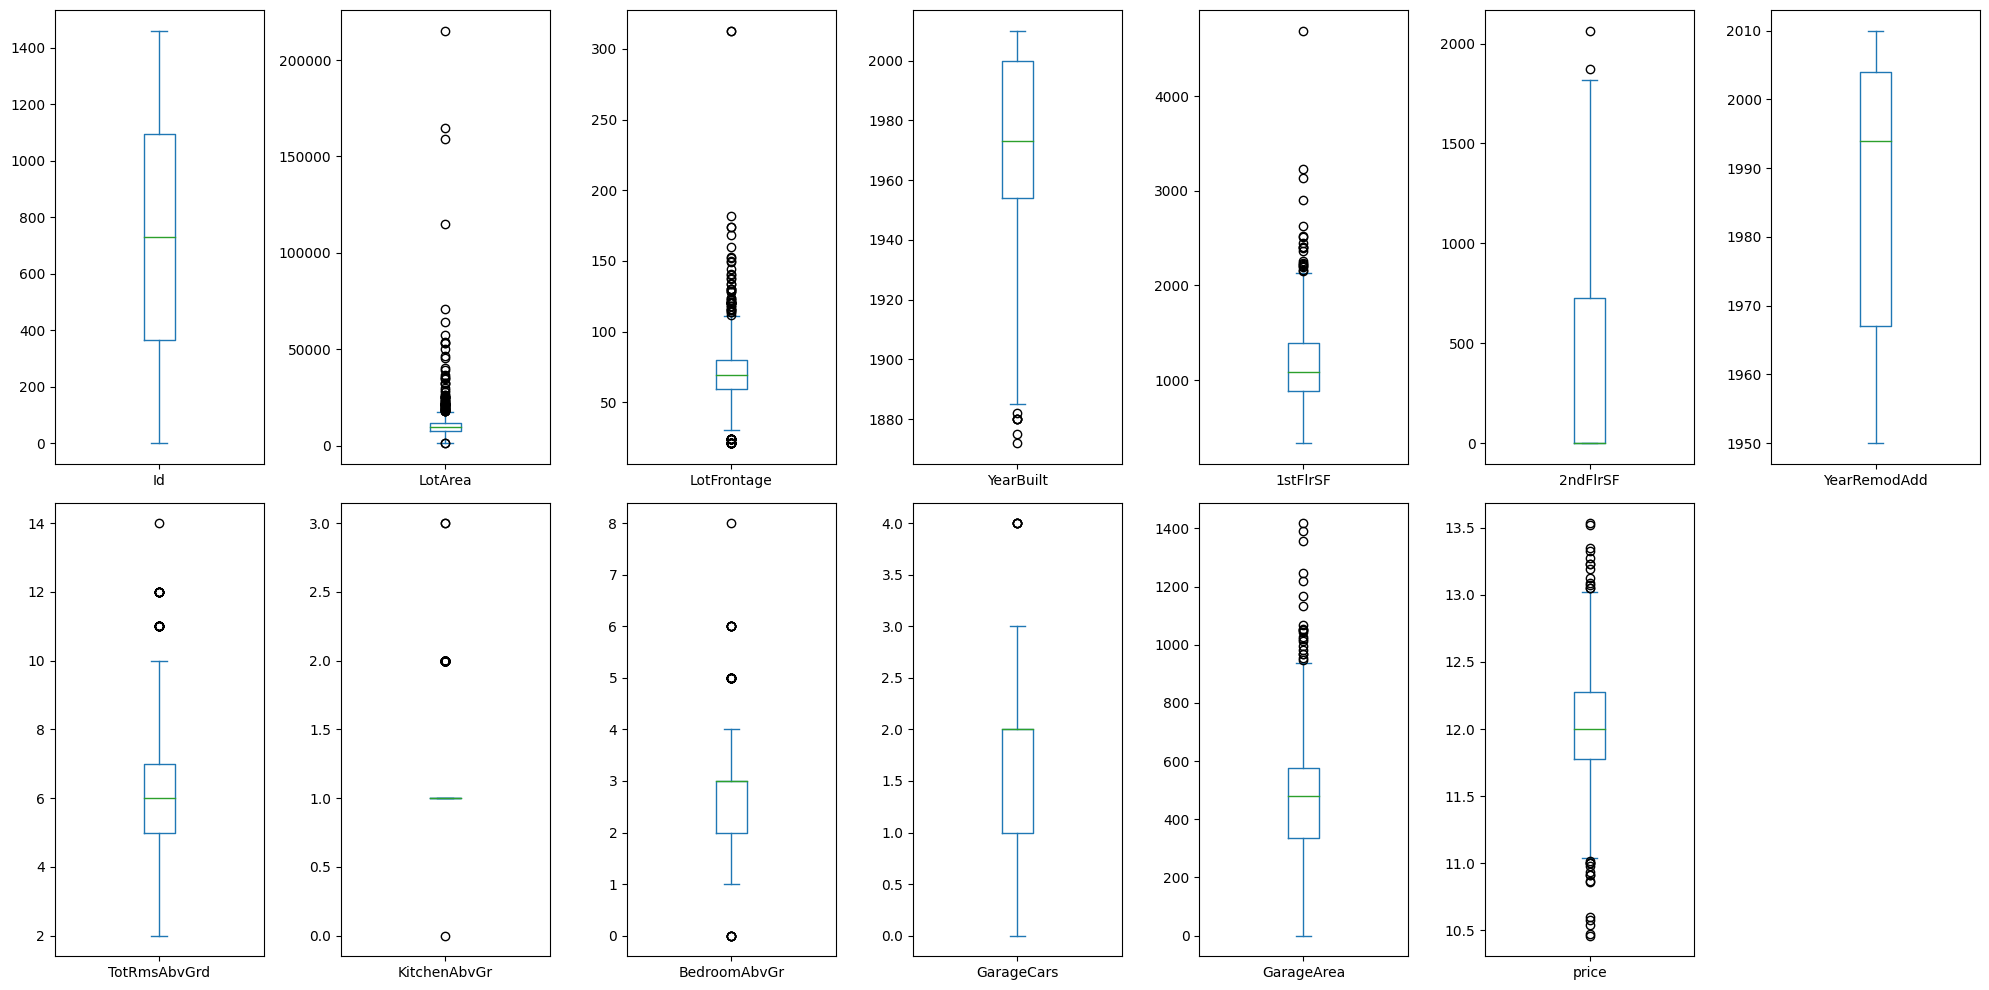

In [5]:
import matplotlib.pyplot as plt
df.plot(kind='box',subplots=True,layout=(2,len(df.columns)//2+1),figsize=(20,10))
plt.tight_layout()
plt.show()

In [6]:
data = df.copy()
data = data.rename(columns={'1stFlrSF':'first','2ndFlrSF':'second'})
#rename columns with number to avoid errors when using 'statsmodels ols'

In [7]:
data['YearBuilt']  = abs(data['YearBuilt'] - data['YearBuilt'].max())
data['YearRemodAdd']  = abs(data['YearRemodAdd'] - data['YearRemodAdd'].max())
#make year build feature and year remodel addition year feature useful :)

In [8]:
X = data.drop(columns=['Id','price','LotFrontage'])
#drop dependent feature y and other redundant features
#(no need to drop LotFrontage, but dropped since more than 10% is missing)
y = data['price']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test , y_train, y_test = train_test_split(X,y)

sc = StandardScaler()
sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [12]:
from itertools import permutations
comb = list(permutations(X_train.columns, 2))
len(comb)
#add interaction variables in combination of columns
variables= '+ '.join(list(X_train.columns)) +'+'+ '+'.join([':'.join(list(y)) for y in comb])

In [14]:
from statsmodels.formula.api import ols
res = ols(f'price ~ {variables}', data=pd.concat([X_train,y_train],axis=1)).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     112.7
Date:                Mon, 08 Jan 2024   Prob (F-statistic):               0.00
Time:                        12:29:42   Log-Likelihood:                 502.90
No. Observations:                1095   AIC:                            -893.8
Df Residuals:                    1039   BIC:                            -613.9
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                    10.8557      0.189     57.585      0.000      10.486      11.226
LotArea                    2.456e-05   9.24e-06      2.659      0.008    6.44e-06    4.27e-05
YearBuilt                    -0.0016      0.002     -1.052      0.293      -0.005       0.001
first                         0.0010      0.000      4.558      0.000       0.001       0.001
second                        0.0004      0.000      2.046      0.041    1.48e-05       0.001
YearRemodAdd                 -0.0004      0.002     -0.190      0.849      -0.005       0.004
TotRmsAbvGrd                 -0.0035      0.041     -0.084      0.933      -0.085       0.078
KitchenAbvGr                  0.1074      0.180      0.596      0.551      -0.246       0.461
BedroomAbvGr                 -0.0275      0.048     -0.572      0.567      -0.122       0.067
GarageCars                    0.0293      0.114      0.257      0.798      -0.195       0.254
GarageArea                    0.0007      0.000      1.719      0.086      -0.000       0.002
LotArea:YearBuilt          2.789e-09   5.16e-08      0.054      0.957   -9.85e-08    1.04e-07
LotArea:first             -1.359e-08   2.65e-09     -5.138      0.000   -1.88e-08    -8.4e-09
LotArea:second            -1.086e-08   3.55e-09     -3.057      0.002   -1.78e-08   -3.89e-09
LotArea:YearRemodAdd       -6.04e-08    5.2e-08     -1.161      0.246   -1.62e-07    4.17e-08
LotArea:TotRmsAbvGrd       1.771e-06   8.71e-07      2.032      0.042    6.12e-08    3.48e-06
LotArea:KitchenAbvGr      -3.012e-06   7.21e-06     -0.418      0.676   -1.72e-05    1.11e-05
LotArea:BedroomAbvGr      -6.773e-07   1.53e-06     -0.441      0.659   -3.69e-06    2.33e-06
LotArea:GarageCars        -6.436e-07   3.63e-06     -0.178      0.859   -7.76e-06    6.47e-06
LotArea:GarageArea        -7.604e-10   1.04e-08     -0.073      0.942   -2.12e-08    1.97e-08
YearBuilt:first           -3.045e-06   9.77e-07     -3.116      0.002   -4.96e-06   -1.13e-06
YearBuilt:second           1.985e-06      8e-07      2.481      0.013    4.15e-07    3.56e-06
YearBuilt:YearRemodAdd    -1.611e-05   1.21e-05     -1.333      0.183   -3.98e-05    7.61e-06
YearBuilt:TotRmsAbvGrd        0.0001      0.000      0.542      0.588      -0.000       0.001
YearBuilt:KitchenAbvGr        0.0004      0.001      0.357      0.721      -0.002       0.003
YearBuilt:BedroomAbvGr        0.0003      0.000      0.857      0.391      -0.000       0.001
YearBuilt:GarageCars          0.0001      0.001      0.198      0.843      -0.001       0.001
YearBuilt:GarageArea      -2.841e-06   2.13e-06     -1.334      0.182   -7.02e-06    1.34e-06
first:second              -1.109e-07   5.67e-08     -1.956      0.051   -2.22e-07    3.28e-10
first:YearRemodAdd        -4.945e-07   1.45e-06     -0.341      0.733   -3.

In [15]:
# lasso , ridge , randomforest
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error , r2_score
def MAPE(y_test, y_pred):
    return np.mean(np.abs((y_test - y_pred) / y_test)) * 100


ls = Lasso()
rd = Ridge()
rf = RandomForestRegressor()


def modelpipe(model):

    model.fit(X_train,y_train)
    model_pred = model.predict(X_test)
    mse = mean_squared_error(y_test,model_pred)
    r2score = r2_score(y_test,model_pred)
    mape = MAPE(y_test,model_pred)

    metrics= [mse,r2score,mape]
    return metrics

ls_result =modelpipe(ls)
rd_result =modelpipe(rd)
rf_result =modelpipe(rf)


result = pd.DataFrame([ls_result,rd_result,rf_result],columns = ['mse','r2','mape'],index=['lasso','ridge','randomForest'])
result

,mse,r2,mape
lasso,0.033696,0.774406,1.048041
ridge,0.031100,0.791786,1.056442
randomForest,0.030370,0.796674,0.964392
